In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

from datetime import datetime
import string

In [37]:
from gensim.test.utils import get_tmpfile
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
from sklearn.model_selection import train_test_split
import os

In [2]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("vader_lexicon")

[nltk_data] Downloading package stopwords to /Users/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/simon/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/simon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/simon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# We are using kaggle's 'Harry Potter Movies Dataset', available at https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset.
# The dialogues are stored in "Dialogue.csv" and using "Chapters.csv" we can see, that the first film consists of chapters 1-34.

df_dialogues = pd.read_csv("../Harry_Potter_Movies/Dialogue.csv", encoding="iso-8859-1")

# Now we can take a look at the Dataframe of film one:
# It consists of the Chapter ID, the Place ID, Character ID and is split into the dialogues.
df_dialogues

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.
...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...
7440,7441,234,71,84,Really?
7441,7442,234,71,1,Really.
7442,7443,234,71,1,Ready?


In [4]:
def preprocess(row):
    return gensim.utils.simple_preprocess(row['Dialogue'])

df_dialogues['Tokens_Gensim'] = df_dialogues.apply(preprocess, axis=1)
df_dialogues

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Tokens_Gensim
0,1,1,8,4,I should have known that you would be here...P...,"[should, have, known, that, you, would, be, he..."
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, are, th..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[afraid, so, professor, the, good, and, the, bad]"
3,4,1,8,7,And the boy?,"[and, the, boy]"
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]"
...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,"[then, slytherin, house, will, have, gained, w..."
7440,7441,234,71,84,Really?,[really]
7441,7442,234,71,1,Really.,[really]
7442,7443,234,71,1,Ready?,[ready]


In [5]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation," ")
    return text

df_dialogues["Tokens"] = df_dialogues["Dialogue"].str.lower().apply(remove_punctuations).apply(nltk.word_tokenize)
df_dialogues["Tokens"]
df_dialogues

dialoge = df_dialogues["Tokens"].tolist()
filtered_tokens = []
for line in dialoge:
    line_list = []
    for token in line:
        if token.lower() not in stopwords.words('english') and token not in string.punctuation:
            line_list.append(token)

    filtered_tokens.append(line_list)

df_dialogues["Tokens"] = filtered_tokens
df_dialogues

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Tokens_Gensim,Tokens
0,1,1,8,4,I should have known that you would be here...P...,"[should, have, known, that, you, would, be, he...","[known, would, professor, mcgonagall]"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, are, th...","[good, evening, professor, dumbledore, rumours..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[afraid, so, professor, the, good, and, the, bad]","[afraid, professor, good, bad]"
3,4,1,8,7,And the boy?,"[and, the, boy]",[boy]
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]","[hagrid, bringing]"
...,...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,"[then, slytherin, house, will, have, gained, w...","[slytherin, house, gained, wonderful, wizard, ..."
7440,7441,234,71,84,Really?,[really],[really]
7441,7442,234,71,1,Really.,[really],[really]
7442,7443,234,71,1,Ready?,[ready],[ready]


In [6]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language="english")

dialoge = df_dialogues["Tokens"]

# Lemmitization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer() 

# Stemming und lemmitization gegenüberstellen
for line in dialoge:
    for word in line:
        print( [word , porter.stem(word), lancaster.stem(word),snowball.stem(word), wnl.lemmatize(word)])

['known', 'known', 'known', 'known', 'known']
['would', 'would', 'would', 'would', 'would']
['professor', 'professor', 'profess', 'professor', 'professor']
['mcgonagall', 'mcgonagal', 'mcgonagall', 'mcgonagal', 'mcgonagall']
['good', 'good', 'good', 'good', 'good']
['evening', 'even', 'ev', 'even', 'evening']
['professor', 'professor', 'profess', 'professor', 'professor']
['dumbledore', 'dumbledor', 'dumbl', 'dumbledor', 'dumbledore']
['rumours', 'rumour', 'rumo', 'rumour', 'rumour']
['true', 'true', 'tru', 'true', 'true']
['albus', 'albu', 'alb', 'albus', 'albus']
['afraid', 'afraid', 'afraid', 'afraid', 'afraid']
['professor', 'professor', 'profess', 'professor', 'professor']
['good', 'good', 'good', 'good', 'good']
['bad', 'bad', 'bad', 'bad', 'bad']
['boy', 'boy', 'boy', 'boy', 'boy']
['hagrid', 'hagrid', 'hagrid', 'hagrid', 'hagrid']
['bringing', 'bring', 'bring', 'bring', 'bringing']
['think', 'think', 'think', 'think', 'think']
['wise', 'wise', 'wis', 'wise', 'wise']
['trust', '

In [7]:
# Part of Speech tagging

def pos_tag_text(row):
    # import tokens
    tokens = row["Tokens"]

    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    return pos_tags

# Apply the pos_tag_text() function to the dialogue column
df_dialogues['pos_tags'] = df_dialogues.apply(pos_tag_text, axis=1)

In [8]:
# Chunking

def get_chunks(row):
    # Get the pos_tags
    pos_tags = row['pos_tags']

    # Get chunks
    chunked = nltk.ne_chunk(pos_tags)

    return chunked
    
df_dialogues['chunks'] = df_dialogues.apply(get_chunks, axis=1)

In [9]:
# Load the English model
# spacy model must be installed first with 'python -m spacy download en_core_web_sm' in the terminal
import spacy

nlp = spacy.load('en_core_web_sm')
def extract_entities(row):
    # Process the text
    doc = nlp(row['Dialogue'])
    
    # Extract named entities
    entities = ([(X.text, X.label_) for X in doc.ents])
    
    return entities


df_dialogues['all_entities_spacy_dial'] = df_dialogues.apply(extract_entities, axis=1)

In [10]:
df_characters = pd.read_csv("../Harry_Potter_Movies/Characters.csv", encoding='ISO-8859-1')
df_chardialogues = pd.merge(df_dialogues, df_characters, on='Character ID', how="left")
df_dialHarry = df_chardialogues[df_chardialogues['Character ID'] == 1]
df_dialRon = df_chardialogues[df_chardialogues['Character ID'] == 2]
df_dialHerm = df_chardialogues[df_chardialogues['Character ID'] == 3]
df_dialDumbl = df_chardialogues[df_chardialogues['Character ID'] == 4]
df_dialHagr = df_chardialogues[df_chardialogues['Character ID'] == 5]
df_dialSnape = df_chardialogues[df_chardialogues['Character ID'] == 6]
df_dialVold = df_chardialogues[df_chardialogues['Character ID'] == 9]
df_characters_list = [df_dialHarry,df_dialRon,df_dialHerm,df_dialDumbl,df_dialHagr,df_dialSnape,df_dialVold]

In [11]:
df_movie = pd.read_csv('../Harry_Potter_Movies/Chapters.csv', encoding='ISO-8859-1')
df_movies = pd.merge(df_chardialogues, df_movie, on='Chapter ID', how="left")
df_film1 = df_movies[df_movies['Movie ID'] == 1]
df_film2 = df_movies[df_movies['Movie ID'] == 2]
df_film3 = df_movies[df_movies['Movie ID'] == 3]
df_film4 = df_movies[df_movies['Movie ID'] == 4]
df_film5 = df_movies[df_movies['Movie ID'] == 5]
df_film6 = df_movies[df_movies['Movie ID'] == 6]
df_film7 = df_movies[df_movies['Movie ID'] == 7]
df_film8 = df_movies[df_movies['Movie ID'] == 8]
film_dial_list = [df_film1, df_film2, df_film3,  df_film4, df_film5, df_film6, df_film7, df_film8]

<AxesSubplot:>

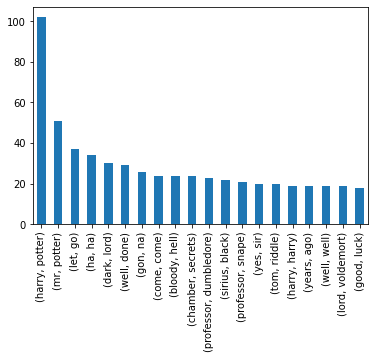

In [12]:
#ngrams
from nltk.util import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt


dialoge = df_dialogues["Tokens"]
dialoge.tolist()
biGram = []
for line in dialoge:
    biGram.append(ngrams(line, 2))
biGram

fdist = FreqDist()
for line in biGram:
    for word in line:
        fdist[word] +=1 
nGram_freq = fdist
all_fdist = FreqDist(nGram_freq).most_common(20)
all_fdist = pd.Series(dict(all_fdist))
all_fdist.plot(kind='bar')

<AxesSubplot:>

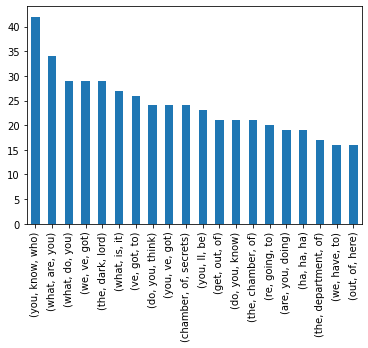

In [13]:
dialoge = df_dialogues["Tokens_Gensim"]
dialoge.tolist()
triGram = []
for line in dialoge:
    triGram.append(ngrams(line, 3))
triGram

fdist = FreqDist()
for line in triGram:
    for word in line:
        fdist[word] +=1 
triGram_freq = fdist
all_fdist = FreqDist(triGram_freq).most_common(20)
all_fdist = pd.Series(dict(all_fdist))
all_fdist.plot(kind='bar')

<AxesSubplot:>

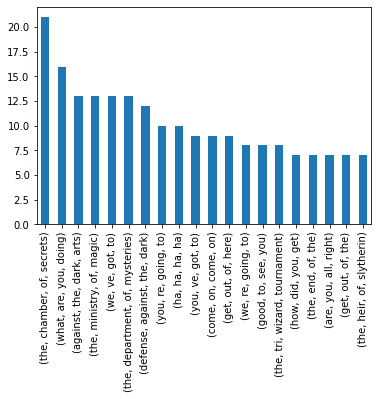

In [14]:
dialoge = df_dialogues["Tokens_Gensim"]
dialoge.tolist()
quadGram = []
for line in dialoge:
    quadGram.append(ngrams(line, 4))
quadGram

fdist = FreqDist()
for line in quadGram:
    for word in line:
        fdist[word] +=1 
quadGram_freq = fdist
all_fdist = FreqDist(quadGram_freq).most_common(20)
all_fdist = pd.Series(dict(all_fdist))
all_fdist.plot(kind='bar')

In [15]:
#wie oft kommt ein Wort vor
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

#mit allen Wörtern
dialoge = df_dialogues["Tokens"]
dialoge

fdist = FreqDist()
for line in dialoge:
    for word in line:
        fdist[word] +=1        
Token_freq = fdist
Token_freq.most_common(5)

#ohne Stopwords
dialoge = df_dialogues["Tokens"]
dialoge

fdist = FreqDist()
for line in dialoge:
    for word in line:
        fdist[word] +=1        
ohnestopwords_freq = fdist
freq = ohnestopwords_freq.most_common(5)


#fdist.plot(5, title = "most frequent top 5 Words")

print([Token_freq.most_common(5), ohnestopwords_freq.most_common(5)])

#für Harry

df_dialHarry
fdistH = FreqDist()
for line in df_dialHarry["Tokens"]:
    for word in line:
         fdistH[word] +=1        
commonwords_freq = fdistH
print(commonwords_freq)
freqH = commonwords_freq.most_common(50)
freqH

[[('harry', 712), ('know', 429), ('well', 374), ('one', 344), ('potter', 309)], [('harry', 712), ('know', 429), ('well', 374), ('one', 344), ('potter', 309)]]
<FreqDist with 1692 samples and 6433 outcomes>


[('sir', 121),
 ('know', 111),
 ('think', 79),
 ('hermione', 78),
 ('one', 70),
 ('ron', 70),
 ('get', 60),
 ('well', 59),
 ('go', 59),
 ('hagrid', 59),
 ('professor', 57),
 ('got', 56),
 ('come', 52),
 ('right', 49),
 ('yeah', 46),
 ('like', 45),
 ('dumbledore', 45),
 ('see', 43),
 ('something', 42),
 ('yes', 41),
 ('back', 41),
 ('tell', 40),
 ('going', 40),
 ('could', 38),
 ('voldemort', 38),
 ('mean', 37),
 ('let', 36),
 ('need', 34),
 ('sirius', 32),
 ('us', 31),
 ('really', 31),
 ('kill', 29),
 ('sorry', 28),
 ('dobby', 28),
 ('oh', 27),
 ('take', 26),
 ('look', 26),
 ('would', 26),
 ('okay', 25),
 ('never', 24),
 ('find', 24),
 ('help', 21),
 ('snape', 20),
 ('said', 20),
 ('want', 20),
 ('happened', 19),
 ('good', 19),
 ('time', 19),
 ('luna', 19),
 ('mr', 18)]

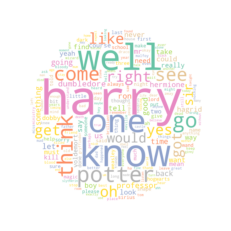

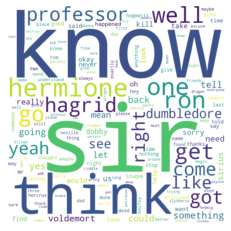

In [16]:
#Wordcloud für alle
import numpy as np
from wordcloud import WordCloud
x,y = np.ogrid[:1000,:1000]
mask = (x-500)**2 +(y-500)**2> 400**2
mask = 255*mask.astype(int)

word_cloud = WordCloud( mask = mask, background_color= "white", colormap = "Set2", width = 800, height = 400).generate_from_frequencies(ohnestopwords_freq)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#wordclound für Harry
word_cloud = WordCloud(background_color="white", width = 1000, height = 1000, min_font_size = 15).generate_from_frequencies(commonwords_freq)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

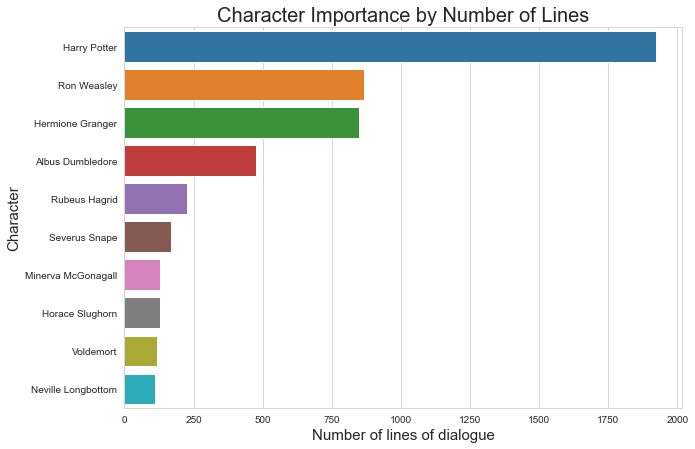

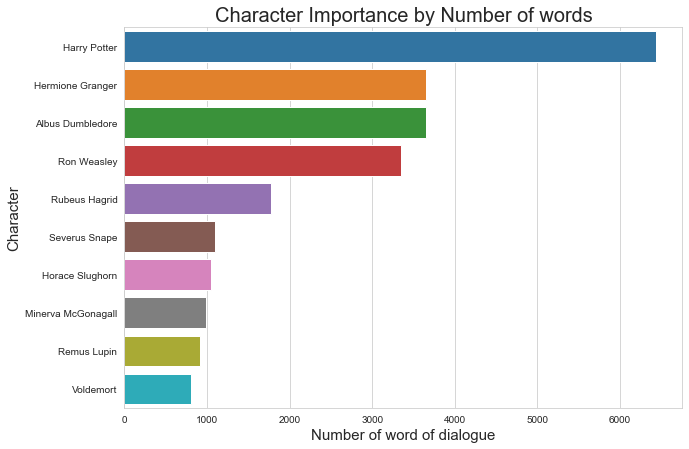

In [17]:
#Redeanteile der Charaktere pro Satz
import numpy 
import seaborn as sns
from collections import Counter
import re

charaktere = df_chardialogues["Character Name"].value_counts()
charaktere

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.countplot(y =df_chardialogues["Character Name"], data = df_chardialogues, order = df_chardialogues["Character Name"].value_counts().iloc[:10].index)
plt.xlabel("Number of lines of dialogue", fontsize = 15)
plt.ylabel("Character", fontsize = 15)
plt.title("Character Importance by Number of Lines", fontsize = 20)
plt.show()

#Redeanteil der Charaktere pro Wort
dialoge = df_chardialogues["Tokens"]
wordcount = []
for line in dialoge:
    wordcount.append(len(line))
wordcount
df_chardialogues["wordcount"] = wordcount
df_dialogues

totalword = df_chardialogues.groupby("Character Name", as_index= False).wordcount.sum()
totalword = totalword.rename(columns ={ totalword.columns[0]: "CharacterName"})
totalword

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x = "wordcount", y ="CharacterName", data = totalword, order = totalword.sort_values("wordcount",ascending = False).CharacterName[0:10], orient = "h")
plt.xlabel("Number of word of dialogue", fontsize = 15)
plt.ylabel("Character", fontsize = 15)
plt.title("Character Importance by Number of words", fontsize = 20)
plt.show()

In [18]:
dialogues = df_dialogues["Dialogue"].tolist()
dialogues_tokens = [nltk.word_tokenize(line) for line in dialogues]

# Then we remove stopwords. This works by creating a loop that iterates over each token in a line of dialogue (token for token in line).
# If the lowercase version of that token is not in a list of stopwords (if token.lower() not in stop_words and token not in string.punctuation) 
# we output it into the filtered_tokens list.
# We use the stopwords from NLTK and Python's built-in string method.
stop_words = stopwords.words("english")
filtered_tokens = [[token for token in line if token.lower() not in stop_words and token not in string.punctuation] for line in dialogues_tokens]

# Now we assign the filtered_tokens list back to the dataframe.
df_dialogues = df_dialogues.assign(tokens=filtered_tokens)
df_dialogues


,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Tokens_Gensim,Tokens,pos_tags,chunks,all_entities_spacy_dial,tokens
0,1,1,8,4,I should have known that you would be here...P...,"[should, have, known, that, you, would, be, he...","[known, would, professor, mcgonagall]","[(known, VBN), (would, MD), (professor, VB), (...","[(known, VBN), (would, MD), (professor, VB), (...","[(McGonagall, PERSON)]","[known, would, ..., Professor, McGonagall]"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, are, th...","[good, evening, professor, dumbledore, rumours...","[(good, JJ), (evening, NN), (professor, NN), (...","[(good, JJ), (evening, NN), (professor, NN), (...","[(evening, TIME), (Dumbledore, PERSON), (Albus...","[Good, evening, Professor, Dumbledore, rumours..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[afraid, so, professor, the, good, and, the, bad]","[afraid, professor, good, bad]","[(afraid, NN), (professor, NN), (good, JJ), (b...","[(afraid, NN), (professor, NN), (good, JJ), (b...",[],"['m, afraid, Professor, good, bad]"
3,4,1,8,7,And the boy?,"[and, the, boy]",[boy],"[(boy, NN)]","[(boy, NN)]",[],[boy]
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]","[hagrid, bringing]","[(hagrid, JJ), (bringing, NN)]","[(hagrid, JJ), (bringing, NN)]","[(Hagrid, ORG)]","[Hagrid, bringing]"
...,...,...,...,...,...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,"[then, slytherin, house, will, have, gained, w...","[slytherin, house, gained, wonderful, wizard, ...","[(slytherin, NN), (house, NN), (gained, VBD), ...","[(slytherin, NN), (house, NN), (gained, VBD), ...","[(Slytherin House, ORG), (Gryffindor, PERSON)]","[Slytherin, House, gained, wonderful, wizard, ..."
7440,7441,234,71,84,Really?,[really],[really],"[(really, RB)]","[(really, RB)]",[],[Really]
7441,7442,234,71,1,Really.,[really],[really],"[(really, RB)]","[(really, RB)]",[],[Really]
7442,7443,234,71,1,Ready?,[ready],[ready],"[(ready, JJ)]","[(ready, JJ)]",[],[Ready]


In [19]:
# Spells

df_spells = pd.read_csv("../Harry_Potter_Movies/Spells.csv")
spells = df_spells['Incantation'].to_list()

# Check whether a row (i.e., a dialogue) contains a spell, and returns the spell as item of a list in the row. Function had to be modified to recognize BOTH one- and two-word spells.
def count_spells_1and2words(row, spells):
    used_spells = []
    for spell in spells:
        if ' ' in spell:
            # Check if the two-word spell appears as a whole
            if spell in ' '.join(row):
                used_spells.append(spell)
        else:
            # Check if the one-word spell appears as a whole or as part of a larger word
            if spell in row:
                used_spells.append(spell)
    return used_spells

# Use count_spells_1and2words and apply it into the column 'spell_count' for each row.
df_dialogues['spell_count'] = df_dialogues['tokens'].apply(count_spells_1and2words, spells=spells)

# make spell_counts a dataframe that consists of the spell as index and the value_count as df entry
spell_counts = df_dialogues['spell_count'].value_counts()
print(spell_counts.head(10))

[]                    7326
[Expelliarmus]          12
[Expecto Patronum]      11
[Lumos]                  9
[Riddikulus]             8
[Accio]                  6
[Alohomora]              5
[Impedimenta]            4
[Confringo]              4
[Stupefy]                4
Name: spell_count, dtype: int64


In [20]:
df_dialogues

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Tokens_Gensim,Tokens,pos_tags,chunks,all_entities_spacy_dial,tokens,spell_count
0,1,1,8,4,I should have known that you would be here...P...,"[should, have, known, that, you, would, be, he...","[known, would, professor, mcgonagall]","[(known, VBN), (would, MD), (professor, VB), (...","[(known, VBN), (would, MD), (professor, VB), (...","[(McGonagall, PERSON)]","[known, would, ..., Professor, McGonagall]",[]
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, are, th...","[good, evening, professor, dumbledore, rumours...","[(good, JJ), (evening, NN), (professor, NN), (...","[(good, JJ), (evening, NN), (professor, NN), (...","[(evening, TIME), (Dumbledore, PERSON), (Albus...","[Good, evening, Professor, Dumbledore, rumours...",[]
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[afraid, so, professor, the, good, and, the, bad]","[afraid, professor, good, bad]","[(afraid, NN), (professor, NN), (good, JJ), (b...","[(afraid, NN), (professor, NN), (good, JJ), (b...",[],"['m, afraid, Professor, good, bad]",[]
3,4,1,8,7,And the boy?,"[and, the, boy]",[boy],"[(boy, NN)]","[(boy, NN)]",[],[boy],[]
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]","[hagrid, bringing]","[(hagrid, JJ), (bringing, NN)]","[(hagrid, JJ), (bringing, NN)]","[(Hagrid, ORG)]","[Hagrid, bringing]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,"[then, slytherin, house, will, have, gained, w...","[slytherin, house, gained, wonderful, wizard, ...","[(slytherin, NN), (house, NN), (gained, VBD), ...","[(slytherin, NN), (house, NN), (gained, VBD), ...","[(Slytherin House, ORG), (Gryffindor, PERSON)]","[Slytherin, House, gained, wonderful, wizard, ...",[]
7440,7441,234,71,84,Really?,[really],[really],"[(really, RB)]","[(really, RB)]",[],[Really],[]
7441,7442,234,71,1,Really.,[really],[really],"[(really, RB)]","[(really, RB)]",[],[Really],[]
7442,7443,234,71,1,Ready?,[ready],[ready],"[(ready, JJ)]","[(ready, JJ)]",[],[Ready],[]


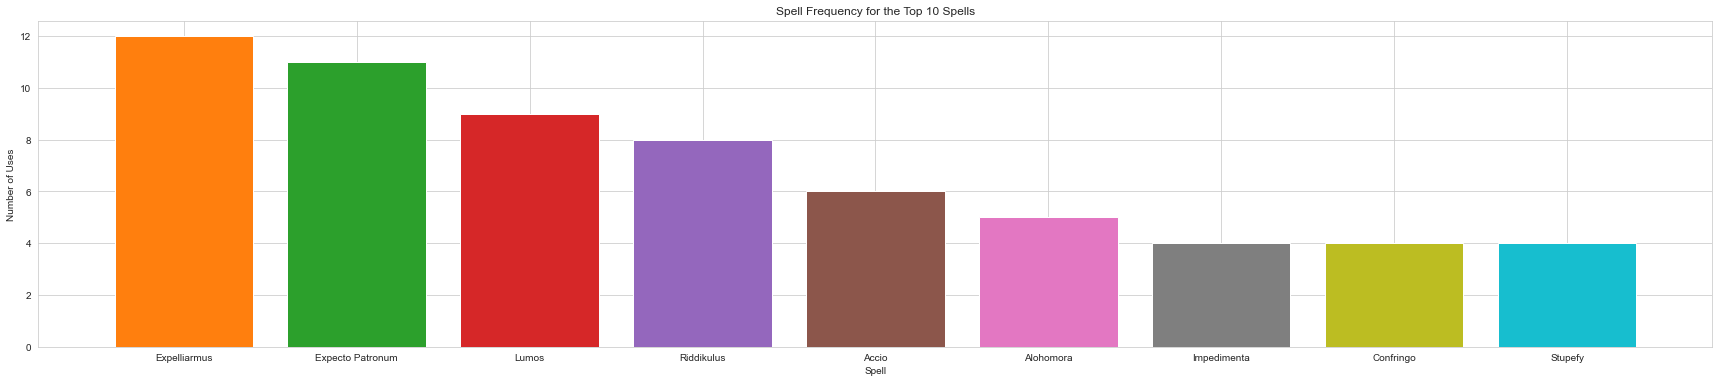

In [21]:
counts = df_dialogues['spell_count'].value_counts()
most_used_spells = counts[:10]
plt.figure(figsize=(30, 6))

for character_id, count in most_used_spells.items():
    plt.bar(character_id, count)

plt.xlabel("Spell")
plt.ylabel("Number of Uses")
plt.title("Spell Frequency for the Top 10 Spells")
plt.show()

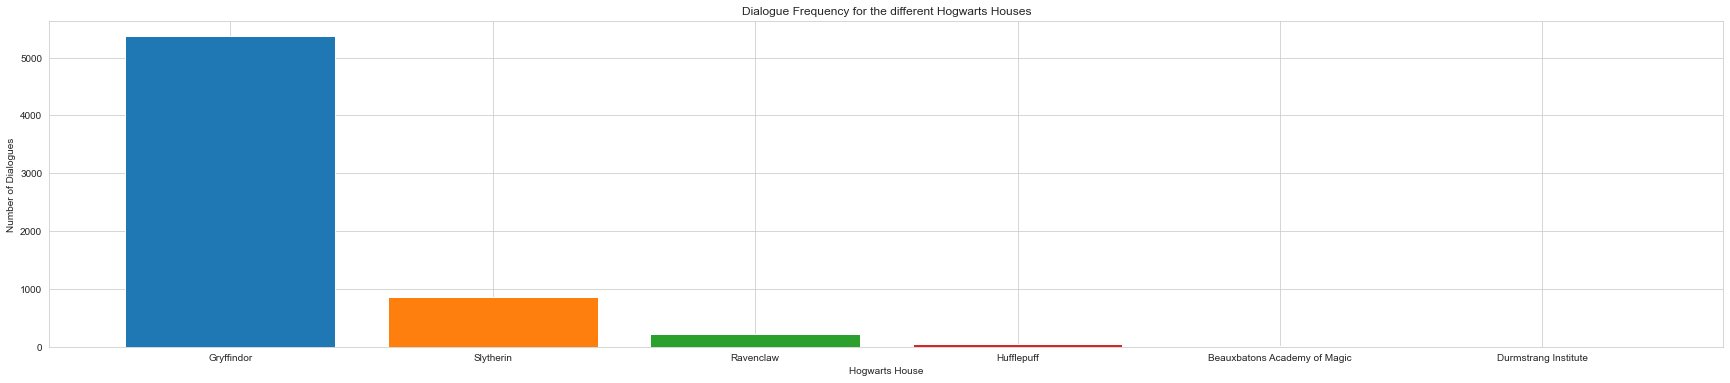

In [22]:
# Count and barplot of dialogue per house...

counts = df_chardialogues['House'].value_counts()
top_talkative_houses = counts[:10]

plt.figure(figsize=(30, 6))

for character_id, count in top_talkative_houses.items():
    plt.bar(character_id, count)

plt.xlabel("Hogwarts House")
plt.ylabel("Number of Dialogues")
plt.title("Dialogue Frequency for the different Hogwarts Houses")
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/69/v3q80y_54rbdy94rpf74f5w80000gn/T/ipykernel_91115/2126131554.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DialogHarry["SentimentScore"] = scores
/var/folders/69/v3q80y_54rbdy94rpf74f5w80000gn/T/ipykernel_91115/2126131554.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DialogHarry["CompScore"] = DialogHarry.SentimentScore.apply(lambd

0.01020965976353101

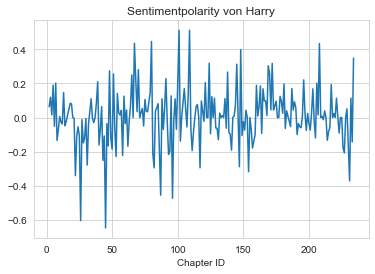

In [23]:
#SentimentAnalyse von Harry pro Chapter
DialogHarry= df_dialogues[df_dialogues["Character ID"]==1]
DialogHarry

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download("vader_lexicon")
sediment = nltk.sentiment.vader.SentimentIntensityAnalyzer()

scores = DialogHarry.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
DialogHarry["SentimentScore"] = scores
DialogHarry
DialogHarry["CompScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("compound"))
DialogHarry["PosScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("pos"))
DialogHarry["NegScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("neg"))
DialogHarry["NeuScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("neu"))
DialogHarry

Chaptersentiment = DialogHarry.groupby("Chapter ID").mean()["CompScore"]
Chaptersentiment
#### PROBLEM: CHAPTER 1 hat Harry nix gesprochen
Chaptersentiment.plot(x= "Chapter ID", y = "CompScore", title="Sentimentpolarity von Harry")

#gesamte HarryScore über alle Kapitel
score = Chaptersentiment.mean()
score # = -0.035501721986438264
###vlt noch Polarität score Intervalle festlegen

In [24]:
#SentimentAnalyse über den gesamten Film
scores = df_dialogues.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
df_dialogues["SentimentScore"] = scores
df_dialogues["CompScore"] = df_dialogues.SentimentScore.apply(lambda x: x.get("compound"))
df_dialogues["PosScore"] = df_dialogues.SentimentScore.apply(lambda x: x.get("pos"))
df_dialogues["NegScore"] = df_dialogues.SentimentScore.apply(lambda x: x.get("neg"))
df_dialogues["NeuScore"] = df_dialogues.SentimentScore.apply(lambda x: x.get("neu"))
df_dialogues
score = df_dialogues.mean()["CompScore"]
score # = 0.04966960451977401

/var/folders/69/v3q80y_54rbdy94rpf74f5w80000gn/T/ipykernel_91115/2626590868.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  score = df_dialogues.mean()["CompScore"]


0.04129742074153681

In [25]:
df_chardialogues

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Tokens_Gensim,Tokens,pos_tags,chunks,all_entities_spacy_dial,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core),wordcount
0,1,1,8,4,I should have known that you would be here...P...,"[should, have, known, that, you, would, be, he...","[known, would, professor, mcgonagall]","[(known, VBN), (would, MD), (professor, VB), (...","[(known, VBN), (would, MD), (professor, VB), (...","[(McGonagall, PERSON)]",Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair,4
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, are, th...","[good, evening, professor, dumbledore, rumours...","[(good, JJ), (evening, NN), (professor, NN), (...","[(good, JJ), (evening, NN), (professor, NN), (...","[(evening, TIME), (Dumbledore, PERSON), (Albus...",Minerva McGonagall,Human,Female,Gryffindor,Cat,Fir,Dragon Heartstring,7
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[afraid, so, professor, the, good, and, the, bad]","[afraid, professor, good, bad]","[(afraid, NN), (professor, NN), (good, JJ), (b...","[(afraid, NN), (professor, NN), (good, JJ), (b...",[],Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair,4
3,4,1,8,7,And the boy?,"[and, the, boy]",[boy],"[(boy, NN)]","[(boy, NN)]",[],Minerva McGonagall,Human,Female,Gryffindor,Cat,Fir,Dragon Heartstring,1
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]","[hagrid, bringing]","[(hagrid, JJ), (bringing, NN)]","[(hagrid, JJ), (bringing, NN)]","[(Hagrid, ORG)]",Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,"[then, slytherin, house, will, have, gained, w...","[slytherin, house, gained, wonderful, wizard, ...","[(slytherin, NN), (house, NN), (gained, VBD), ...","[(slytherin, NN), (house, NN), (gained, VBD), ...","[(Slytherin House, ORG), (Gryffindor, PERSON)]",Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather,15
7440,7441,234,71,84,Really?,[really],[really],"[(really, RB)]","[(really, RB)]",[],Albus Potter,Human,Male,Slytherin,NaN,NaN,NaN,1
7441,7442,234,71,1,Really.,[really],[really],"[(really, RB)]","[(really, RB)]",[],Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather,1
7442,7443,234,71,1,Ready?,[ready],[ready],"[(ready, JJ)]","[(ready, JJ)]",[],Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather,1


In [26]:
df = df_chardialogues[df_chardialogues['Chapter ID'] <=34]
df = df[df['Character Name'] == "Filius Flitwick"]

In [27]:
df

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Tokens_Gensim,Tokens,pos_tags,chunks,all_entities_spacy_dial,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core),wordcount
418,419,17,26,59,One of a wizard's most rudimentary skills is l...,"[one, of, wizard, most, rudimentary, skills, i...","[one, wizard, rudimentary, skills, levitation,...","[(one, CD), (wizard, NN), (rudimentary, JJ), (...","[(one, CD), (wizard, NN), (rudimentary, JJ), (...","[(One, CARDINAL)]",Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,NaN,NaN,NaN,22
420,421,17,26,59,Good. And enunciate. Wingardium Leviosa. Off y...,"[good, and, enunciate, wingardium, leviosa, of...","[good, enunciate, wingardium, leviosa, go]","[(good, JJ), (enunciate, NN), (wingardium, NN)...","[(good, JJ), (enunciate, NN), (wingardium, NN)...","[(Wingardium Leviosa, PERSON)]",Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,NaN,NaN,NaN,5
426,427,17,26,59,"Oh, well done! See here, everyone! Ms. Granger...","[oh, well, done, see, here, everyone, ms, gran...","[oh, well, done, see, everyone, ms, granger, d...","[(oh, RB), (well, RB), (done, VBN), (see, VBP)...","[(oh, RB), (well, RB), (done, VBN), (see, VBP)...","[(Granger, PERSON)]",Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,NaN,NaN,NaN,10
428,429,17,26,59,"Well done, dear.","[well, done, dear]","[well, done, dear]","[(well, RB), (done, VBN), (dear, NN)]","[(well, RB), (done, VBN), (dear, NN)]",[],Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,NaN,NaN,NaN,3
429,430,17,26,59,Whooaaa! Ooh.,"[whooaaa, ooh]","[whooaaa, ooh]","[(whooaaa, NN), (ooh, NN)]","[(whooaaa, NN), (ooh, NN)]","[(Whooaaa, GPE)]",Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,NaN,NaN,NaN,2


          CharacterName  CompScore
0         Alastor Moody   0.013300
1      Albus Dumbledore   0.132604
2        Arthur Weasley   0.118105
3   Bellatrix Lestrange   0.122644
4       Cornelius Fudge   0.078125
5                 Dobby   0.160000
6      Dolores Umbridge   0.067208
7          Draco Malfoy   0.042075
8          Fred Weasley   0.087596
9         Ginny Weasley   0.039844
10         Harry Potter   0.010529
11     Hermione Granger   0.018481
12      Horace Slughorn   0.208515
13        Lucius Malfoy   0.172372
14   Minerva McGonagall   0.141131
15        Molly Weasley   0.336208
16   Neville Longbottom   0.007163
17          Remus Lupin   0.206703
18          Ron Weasley  -0.020405
19        Rubeus Hagrid   0.044009
20        Severus Snape   0.116869
21         Sirius Black  -0.016956
22           Tom Riddle   0.035182
23       Vernon Dursley   0.039568
24            Voldemort   0.050879


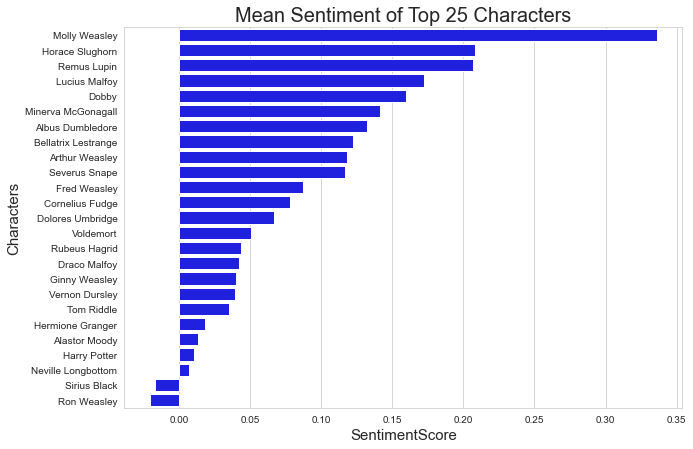

In [28]:
#Sentiment von allen Charakteren
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
sediment = nltk.sentiment.vader.SentimentIntensityAnalyzer()

dialoge = df_chardialogues["Tokens"]
wordcount = []
for line in dialoge:
    wordcount.append(len(line))
wordcount
df_chardialogues["wordcount"] = wordcount
df_chardialogues
filtered = df_chardialogues[df_chardialogues['wordcount'] > 2]
counts = filtered["Character Name"].value_counts()
counts = counts[0:25]
counts = pd.DataFrame(counts)
counts["Count"] =counts["Character Name"]
counts["Character Name"]= counts.index
counts = counts.reset_index()
counts = counts.drop("index",axis =1)
counts

filtered = filtered[filtered["Character Name"].isin(counts["Character Name"])]
filtered
scores = filtered.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
filtered["SentimentScore"] = scores

filtered["CompScore"] = filtered.SentimentScore.apply(lambda x: x.get("compound"))
filtered["PosScore"] = filtered.SentimentScore.apply(lambda x: x.get("pos"))
filtered["NegScore"] = filtered.SentimentScore.apply(lambda x: x.get("neg"))
filtered["NeuScore"] = filtered.SentimentScore.apply(lambda x: x.get("neu"))
filtered
sentiment_characters = filtered.groupby("Character Name", as_index =False).CompScore.mean()
sentiment_characters
sentiment_characters = sentiment_characters.rename(columns ={ sentiment_characters.columns[0]: "CharacterName"})
print(sentiment_characters)

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x= "CompScore" ,y ="CharacterName", data = sentiment_characters, order = sentiment_characters.sort_values("CompScore", ascending =False).CharacterName[0:25], color="blue")
plt.xlabel("SentimentScore", fontsize = 15)
plt.ylabel("Characters", fontsize = 15)
plt.title("Mean Sentiment of Top 25 Characters", fontsize = 20)
plt.show()

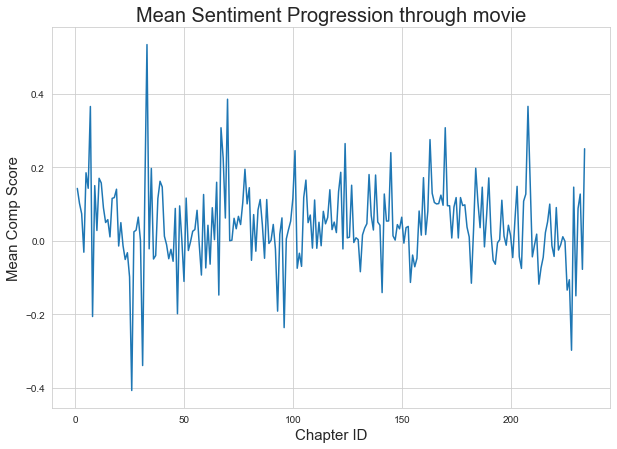

In [32]:
# Sentimentanalyse der Kapitel aber mit allen Charakteren
scores = df_chardialogues.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
df_chardialogues["SentimentScore"] = scores
df_chardialogues["CompScore"] = df_chardialogues.SentimentScore.apply(lambda x: x.get("compound"))
df_chardialogues["PosScore"] = df_chardialogues.SentimentScore.apply(lambda x: x.get("pos"))
df_chardialogues["NegScore"] = df_chardialogues.SentimentScore.apply(lambda x: x.get("neg"))
df_chardialogues["NeuScore"] = df_chardialogues.SentimentScore.apply(lambda x: x.get("neu"))
df_chardialogues

sentimentchapter = pd.DataFrame(df_chardialogues.groupby("Chapter ID", as_index = False).CompScore.mean())
sentimentchapter

# Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.lineplot(x= "Chapter ID" ,y ="CompScore", data = sentimentchapter)
plt.xlabel("Chapter ID", fontsize = 15)
plt.ylabel("Mean Comp Score", fontsize = 15)
plt.title("Mean Sentiment Progression through movie", fontsize = 20)
plt.show()

# Chapter 1 nicht drinnen und sieht halt anders aus als in Kaggle Character Analysis

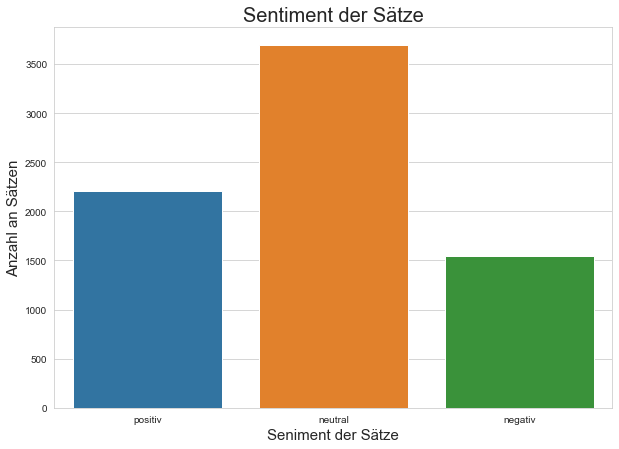

In [33]:
#sentimentflags dazufügen
#film1
df_chardialogues["PosFlag"] = df_chardialogues.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
df_chardialogues["NegFlag"] = df_chardialogues.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
df_chardialogues["NeuFlag"] = df_chardialogues.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0) 
df_chardialogues

AnzahlposSätze = df_chardialogues["PosFlag"].sum()
AnzahlnegSätze = df_chardialogues["NegFlag"].sum()
AnzahlneuSätze = df_chardialogues["NeuFlag"].sum()

y = [AnzahlposSätze,AnzahlneuSätze,AnzahlnegSätze]
x = ["positiv","neutral", "negativ"]

sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x= x ,y = y )
plt.xlabel("Seniment der Sätze", fontsize = 15)
plt.ylabel("Anzahl an Sätzen", fontsize = 15)
plt.title("Sentiment der Sätze", fontsize = 20)
plt.show()

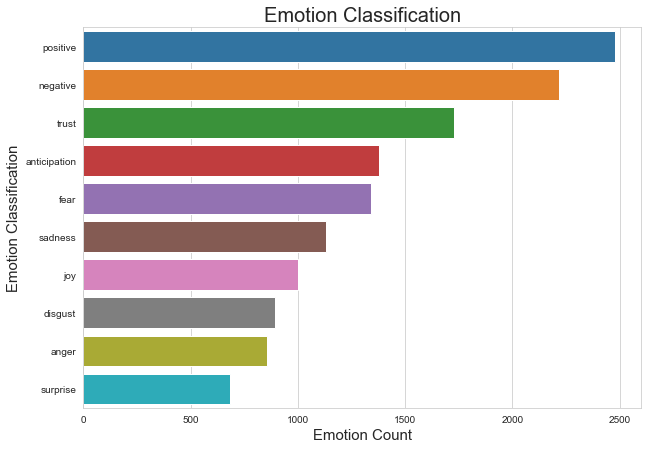

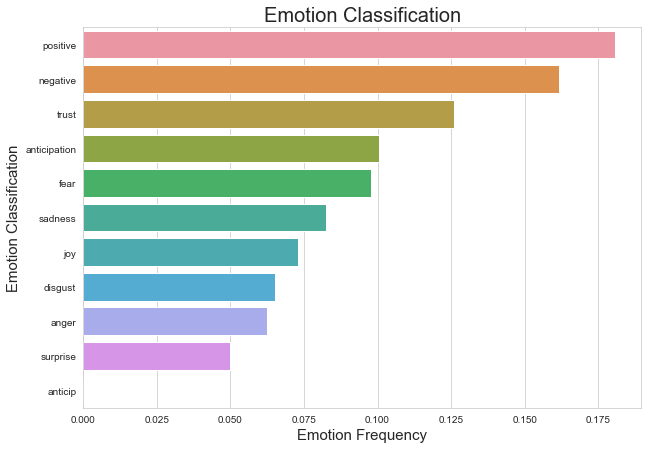

In [35]:
from nrclex import NRCLex

str_dialoge = ",".join(df_chardialogues["Dialogue"])
str_dialoge
dialoge_object = NRCLex(str_dialoge)
dialoge_object


#pro Satz
data = dialoge_object.raw_emotion_scores
data

emotion_df = pd.DataFrame.from_dict(data,orient = "index")
emotion_df= emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={"index": "Emotion Classification", 0: "Emotion Count"})
emotion_df = emotion_df.sort_values(by = ["Emotion Count"], ascending =False)
emotion_df

sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x="Emotion Count" ,y = "Emotion Classification", data = emotion_df)
plt.xlabel("Emotion Count", fontsize = 15)
plt.ylabel("Emotion Classification", fontsize = 15)
plt.title("Emotion Classification", fontsize = 20)
plt.show()

#jedes Wort anschauen
dialoge_object.affect_dict
affect_df = pd.DataFrame.from_dict(dialoge_object.affect_dict, orient ="index")
affect_df

data1 = dialoge_object.affect_frequencies
frequencieemotion_df = pd.DataFrame.from_dict(data1,orient = "index")
frequencieemotion_df= frequencieemotion_df.reset_index()
frequencieemotion_df = frequencieemotion_df.rename(columns={"index": "Emotion Classification", 0: "Emotionfrequency"})
frequencieemotion_df = frequencieemotion_df.sort_values(by = ["Emotionfrequency"], ascending =False)
frequencieemotion_df
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x="Emotionfrequency" ,y = "Emotion Classification", data = frequencieemotion_df)
plt.xlabel("Emotion Frequency", fontsize = 15)
plt.ylabel("Emotion Classification", fontsize = 15)
plt.title("Emotion Classification", fontsize = 20)
plt.show()

In [36]:
NRCLex.lexicon

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

In [ ]:
char_dial_documents_train = []
char_dial_documents_test = []
for df in df_characters_list:
    for _, row in df.iterrows():
        character_id = row['Character ID']
        data = df['tokens'].tolist()
        char_dial_documents_train.append(TaggedDocument(data, [character_id]))
        char_dial_documents_test.append(data)

In [ ]:
film_dial_documents = []
for df in film_dial_list:
    for _, row in df.iterrows():
        movie_id = row['Movie ID']
        data = df['tokens'].tolist()
        film_dial_documents.append(TaggedDocument(data, [movie_id]))